### Logistic Regression using SAS

In [2]:
/*Importing csv file*/
Title 'Reading the csv data';
PROC IMPORT DATAFILE = "kyphosis.csv"
OUT= WORK.kyphosis
DBMS=csv
REPLACE;
GETNAMES=YES;
RUN;

PROC PRINT data = work.kyphosis(obs= 5);
Run;

Obs,Kyphosis,Age,Number,Start
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15


In [3]:
Title 'Setting the data';
DATA kyp; 
SET kyphosis;
RUN;

proc print data = kyp(obs=5);
run;

Obs,Kyphosis,Age,Number,Start
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15


In [5]:
Title 'Getting details about data';
PROC CONTENTS DATA = kyp;
RUN;

In [6]:
Title 'Getting details about data';
PROC means DATA = kyp;
RUN;

Variable,N,Mean,Std Dev,Minimum,Maximum
Age Number Start,81 81 81,83.6543210 4.0493827 11.4938272,58.1042512 1.6194230 4.8839622,1.0000000 2.0000000 1.0000000,206.0000000 10.0000000 18.0000000


In [7]:
 *create a format to group missing and nonmissing;
* getting missing values for both numeric and character variables;

TITLE 'All MISSING VALUES';
proc format;
 value $missfmt ' '='Missing' other='Not Missing';
 value  missfmt  . ='Missing' other='Not Missing';
run;
 
 
proc freq data=kyp; 
format _CHAR_ $missfmt.;
tables _CHAR_ / missing missprint nocum nopercent;
format _NUMERIC_ missfmt.;
tables _NUMERIC_ / missing missprint nocum nopercent;
run;

Kyphosis,Frequency
Not Missing,81
Age,Frequency
Not Missing,81
Number,Frequency
Not Missing,81
Start,Frequency
Not Missing,81


In [8]:
TITLE 'Counting catagory of kyphosis';
Proc freq data = kyp;
 table kyphosis;
run;

Kyphosis,Frequency,Percent,CumulativeFrequency,CumulativePercent
absent,64,79.01,64,79.01
present,17,20.99,81,100.00


In [9]:
TITLE 'Replacing absent by 0 and present by 1';
DATA kyp1;
    set kyp;
    IF Kyphosis = "present" THEN Kyphosis=1;  ELSE Kyphosis=0;
RUN;

PROC PRINT DATA=kyp1(obs=5);
RUN;

Obs,Kyphosis,Age,Number,Start
1,0,71,3,5
2,0,158,3,14
3,1,128,4,5
4,0,2,5,1
5,0,1,4,15


In [10]:
*Logistic regression;
Title "Logistic Regression";
proc logistic data = kyp1 desc;
model kyphosis = age number start;
output out = outdata p= pred_prob lower = low upper =upp;
run;
quit;

In [11]:
*Logistic regression;
Title "Logistic Regression Model Selection";
proc logistic data = kyp1 desc;
model kyphosis = age number start / selection = forward;
run;
quit;

In [12]:
 *Logistic regression;
Title "Logistic Regression Final Model";
proc logistic data = kyp1 desc;
model kyphosis = start;
output out = outdata p= pred_prob lower = low upper =upp;
run;
quit;

In [13]:
* Splitng data into train and test set;
Title 'Spliting Train and Test data';
data kyp2; 
set kyp1; 
n=ranuni(100); 
run; 

proc sort data=kyp2; 
by n;

data training testing; 
set kyp2 nobs=nobs; 
if _n_<= 0.75*nobs then output training; 
else output testing; 
run;

proc print data = training;
run;

proc print data = testing;
run;
quit;


Obs,Kyphosis,Age,Number,Start,n
1,0,158,3,14,0.00887
2,1,42,7,6,0.01087
3,0,100,3,14,0.03647
4,0,97,3,16,0.04708
5,0,87,4,16,0.07076
6,0,1,3,9,0.10424
7,0,35,3,13,0.11049
8,0,130,5,13,0.12136
9,1,121,3,3,0.13179
10,0,178,4,15,0.14349


In [14]:
*Split Train and Test Data set in SAS  –  PROC SURVEYSELECT : Method 2;
proc surveyselect data=kyp1 rat=0.75
out= kyp1_select outall
method=srs; 
run;


Selection Method,Simple Random Sampling
Input Data Set,KYP1
Random Number Seed,678627786
Sampling Rate,0.75
Sample Size,61
Selection Probability,0.753086
Sampling Weight,0
Output Data Set,KYP1_SELECT


In [15]:
data kyp1_train kyp1_test; 
set kyp1_select; 
if selected = 1 then output kyp1_train; 
else output kyp1_test; 
run;

proc print data = kyp1_train;
run;

proc print data = kyp1_test;
run;
quit;

Obs,Selected,Kyphosis,Age,Number,Start
1,1,0,71,3,5
2,1,0,158,3,14
3,1,1,128,4,5
4,1,0,2,5,1
5,1,0,1,4,15
6,1,0,1,2,16
7,1,0,37,3,16
8,1,0,113,2,16
9,1,1,82,5,14
10,1,0,18,5,2



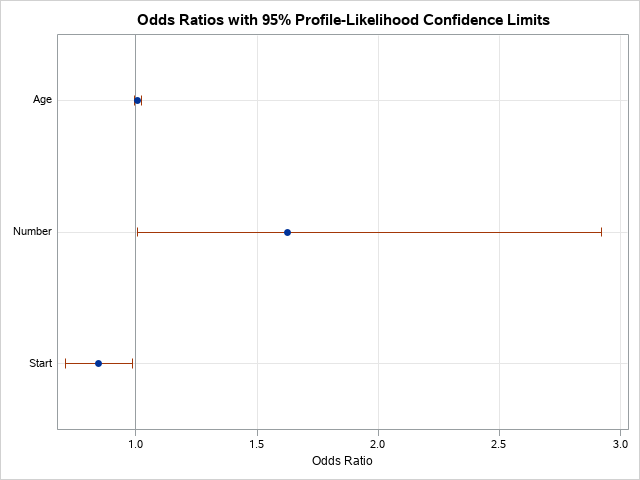
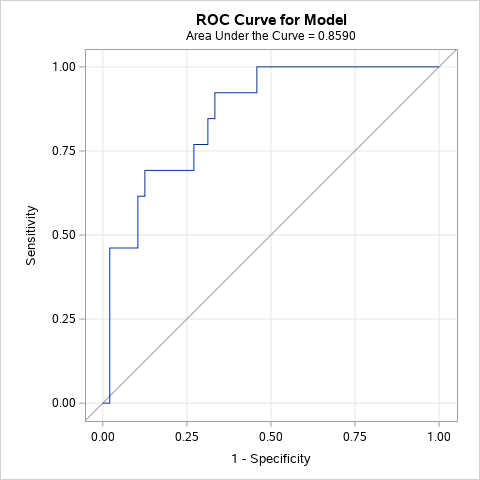
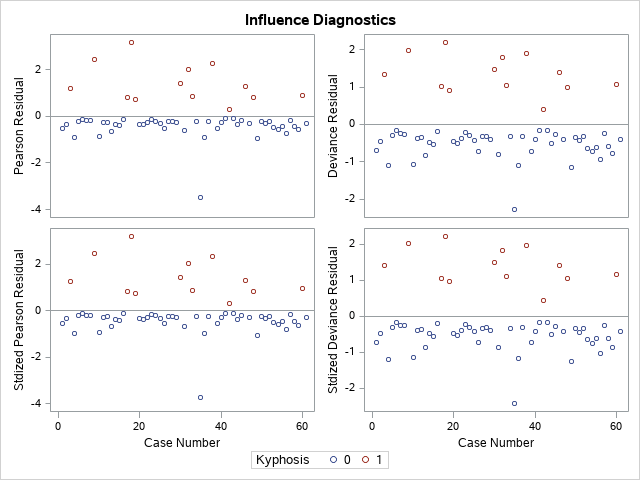
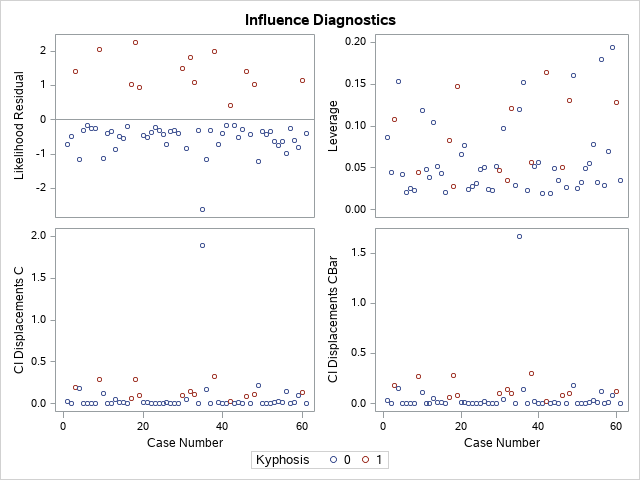
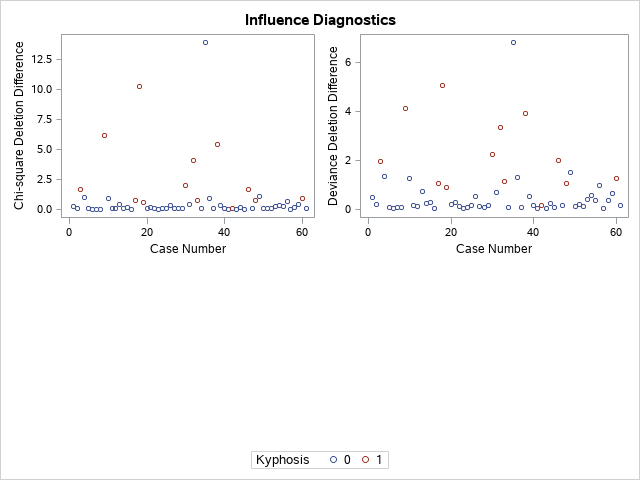
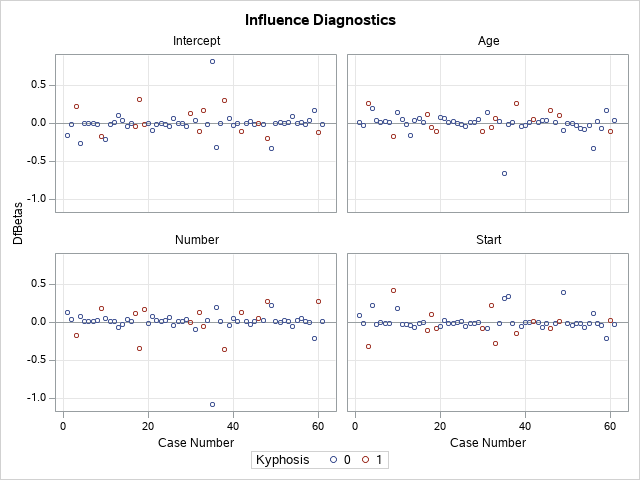
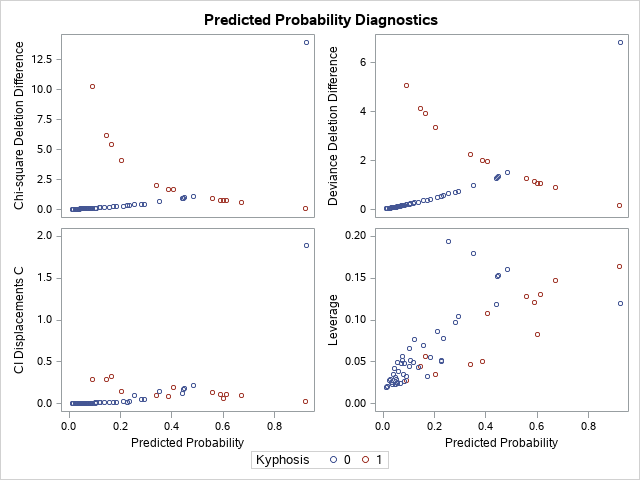
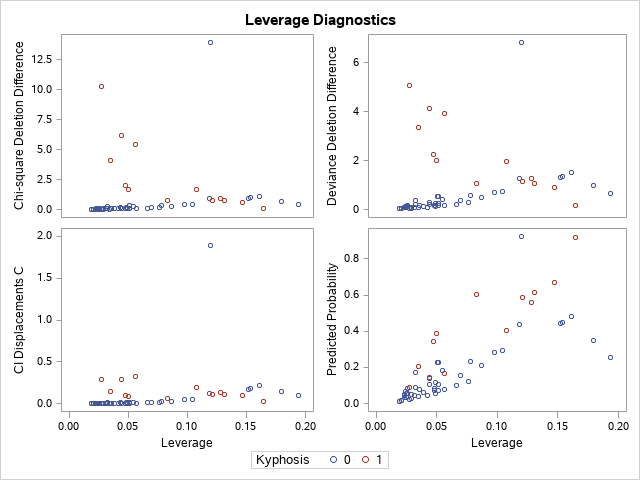
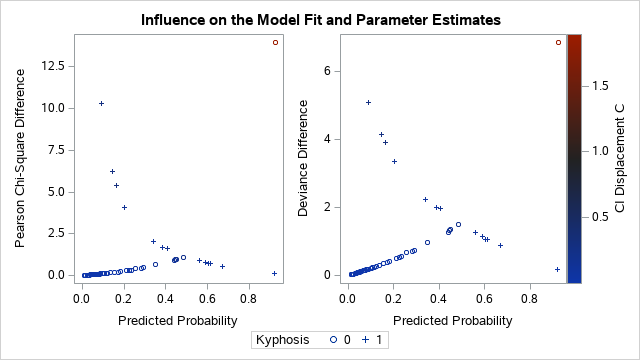
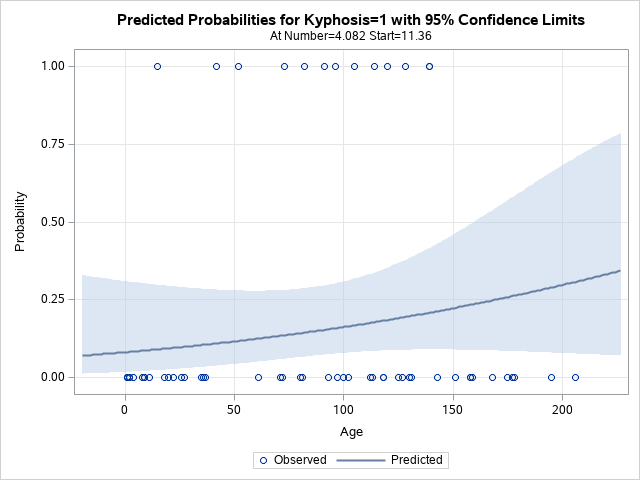
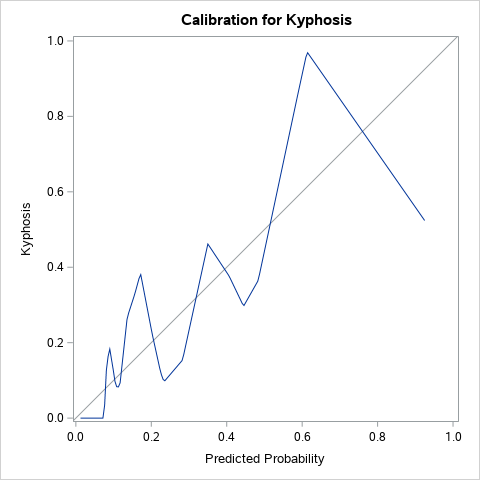

In [29]:
Title 'Logistic Reg';
proc logistic data=kyp1_train plots = all;
model Kyphosis(event = '1') = Age Number Start / clodds = pl;
score data = kyp1_test out=mypreds;
run;

In [22]:
proc print data =mypreds;
run;

Obs,Selected,Kyphosis,Age,Number,Start,F_Kyphosis,I_Kyphosis,P_1,P_0
1,0,0,61,2,17,0,0,0.01959,0.98041
2,0,1,59,6,12,1,0,0.24316,0.75684
3,0,0,148,3,16,0,0,0.07059,0.92941
4,0,0,1,3,16,0,0,0.02353,0.97647
5,0,0,78,6,15,0,0,0.18290,0.81710
6,0,0,131,2,3,0,0,0.27145,0.72855
7,0,0,31,3,16,0,0,0.02956,0.97044
8,0,0,140,5,11,0,0,0.30602,0.69398
9,0,0,136,4,15,0,0,0.11757,0.88243
10,0,1,121,3,3,1,0,0.35905,0.64095
